## 4 Improving the Linear Regression Model

Given the previous evaluation, it seems the model performs differently well for the different bus stops/"stop sequences". The aim in this section is to further improve the model by applying and training it for each stop individually.

Furthermore, to predict further bus stops ahead for which no upstream_stop_delay is given, the ability of the model to predict arrival delays based on n upstream stops is assessed.

In [88]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pickle

sns.set(font_scale=0.6)

### Loading the Data & LR model

In [3]:
# load data into df
path = 'data/Dataset-PT.csv'
df = pd.read_csv(path, header=1)
df['upstream_delay_incl_dwell'] = df['upstream_stop_delay'] + df['dwell_time']

In [4]:
# Linear regression
with open('models/linear_regression.pkl', 'rb') as f:
    model_lr = pickle.load(f)

### Create a different model for each station

In [90]:
def save_to_keras(X_train, model_lr, stop_sequence):
  # save linear regression as Keras style model
  keras_model = Sequential()
  keras_model.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))
  keras_model.compile(optimizer='adam', loss='mean_squared_error')

  # Transfer the weights and intercept
  weights = model_lr.coef_.reshape(X_train.shape[1], 1)
  bias = np.array([model_lr.intercept_])
  keras_model.layers[0].set_weights([weights, bias])

  keras_model.save(f'models/stop_specific/lr_stop_{stop_sequence}.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

,stop_sequence,model,mae,mse,r2
0,1,stop-specific,28.826097,1801.814641,0.920729
1,1,general,78.517399,10215.222162,0.550578
2,2,stop-specific,7.686951,103.107216,0.995759
3,2,general,40.694910,3460.265087,0.857660
4,3,stop-specific,7.585498,98.652276,0.996058
5,3,general,45.927044,3868.202297,0.845441
6,4,stop-specific,16.895382,538.959561,0.979766
7,4,general,71.894827,6955.042140,0.738892
8,5,stop-specific,14.029384,405.226501,0.984562
9,5,general,35.720230,2655.800106,0.898819


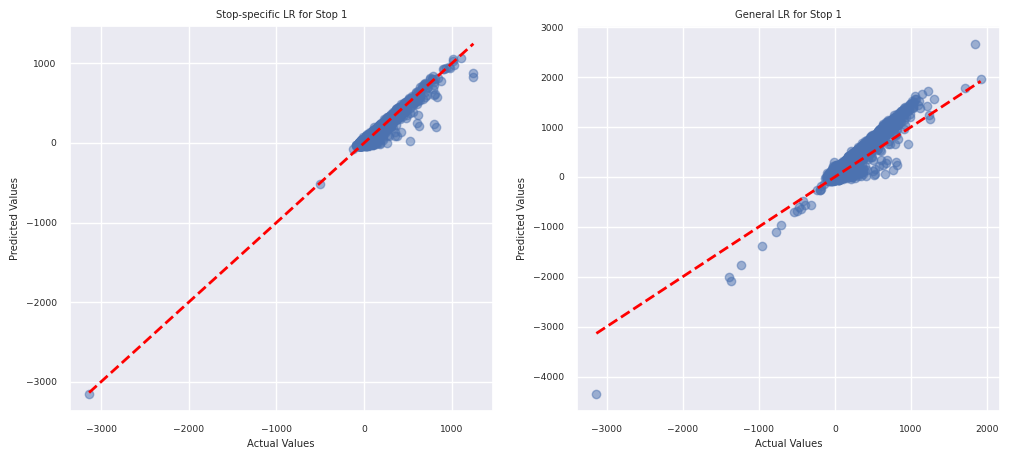

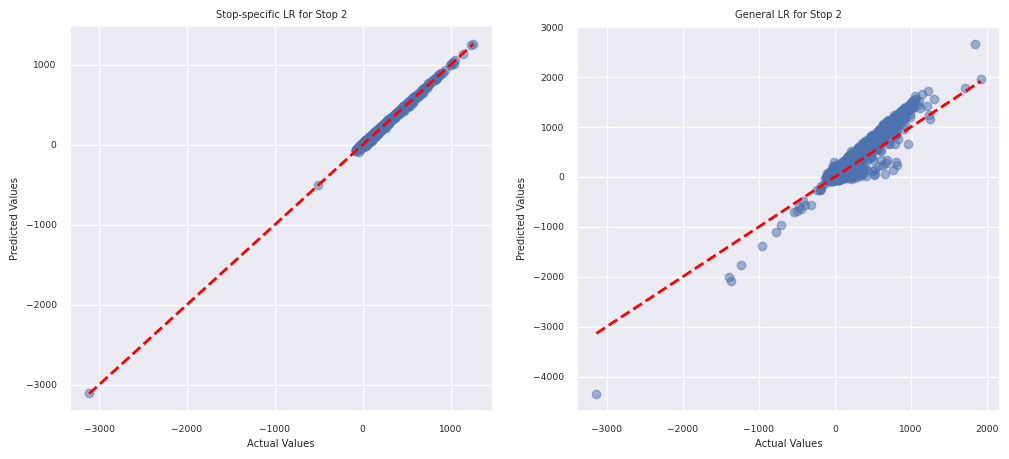

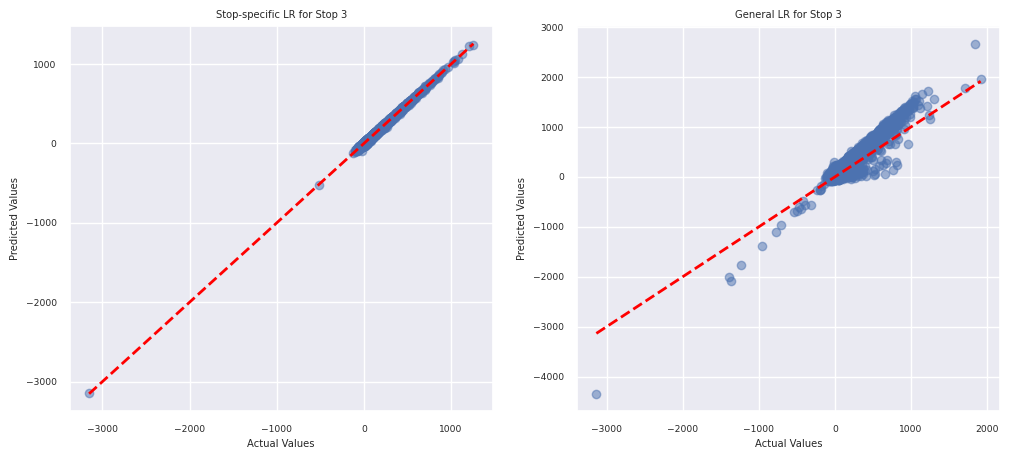

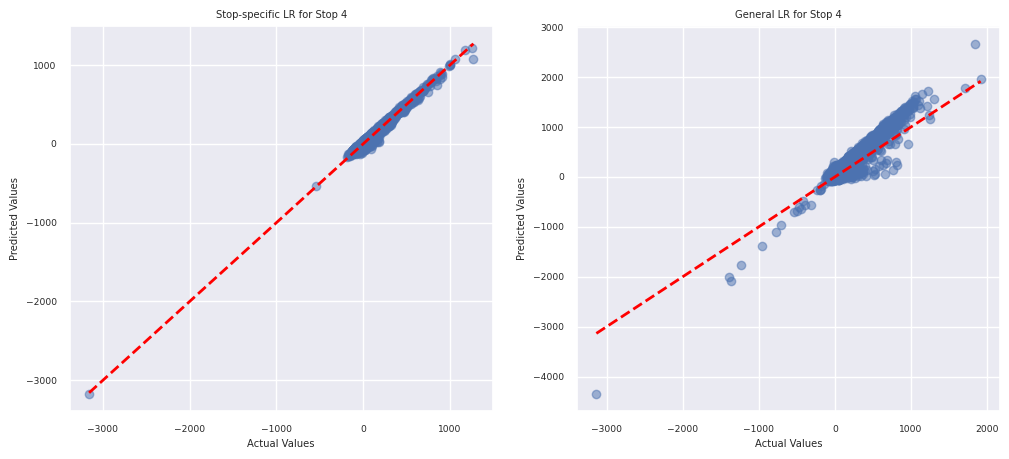

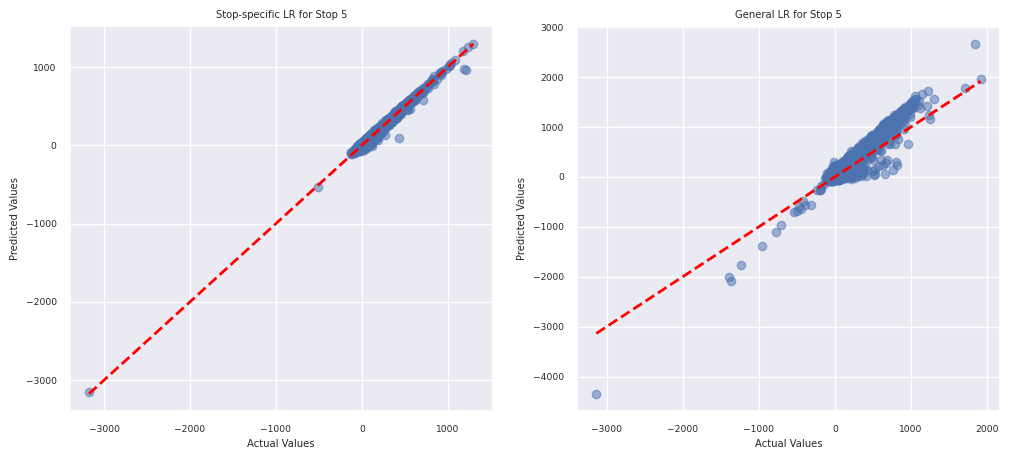

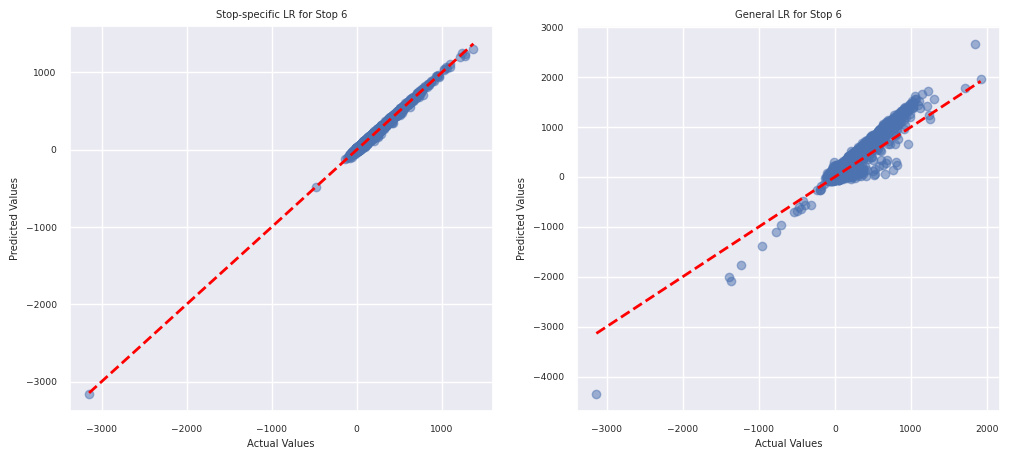

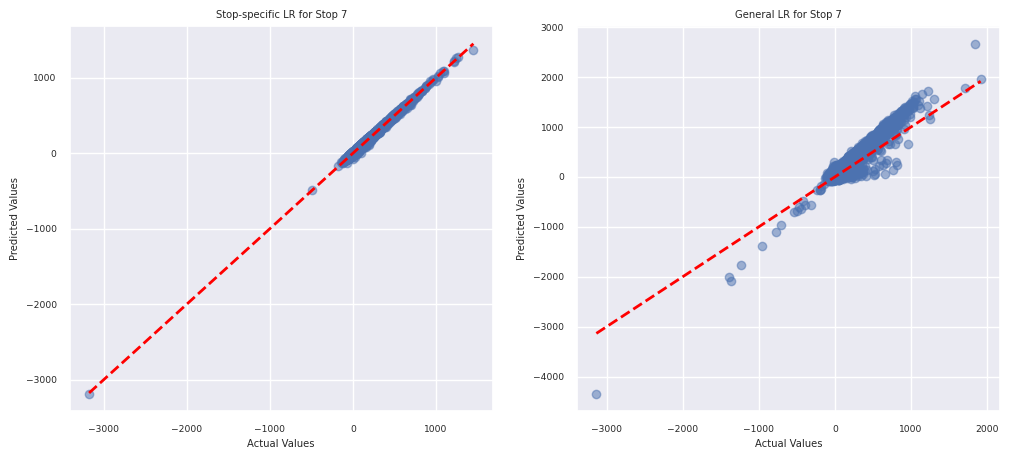

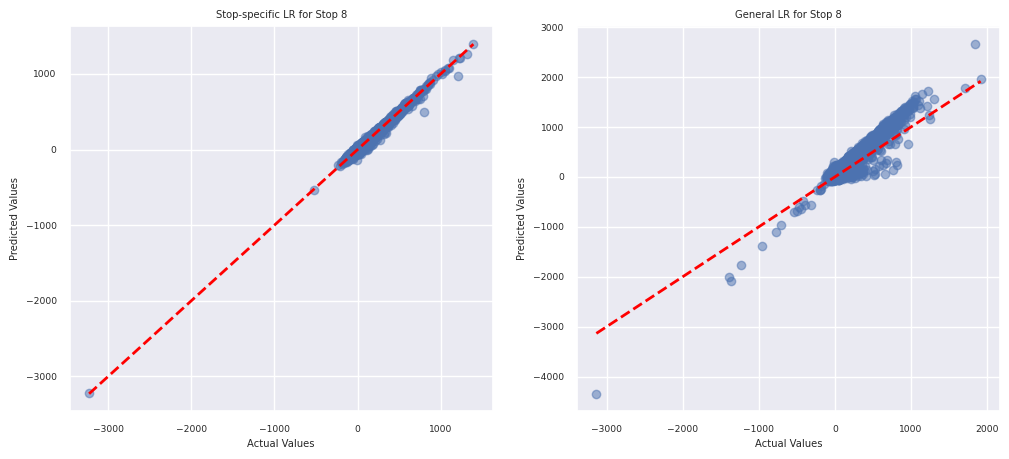

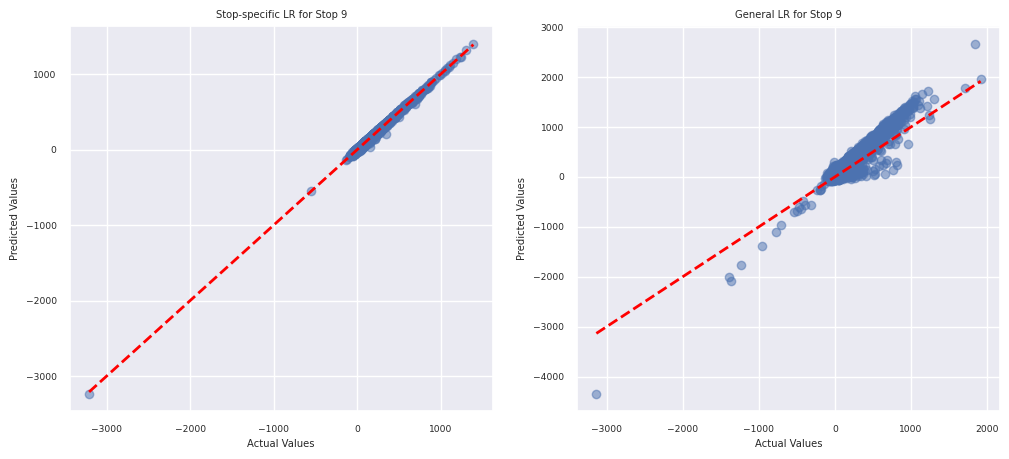

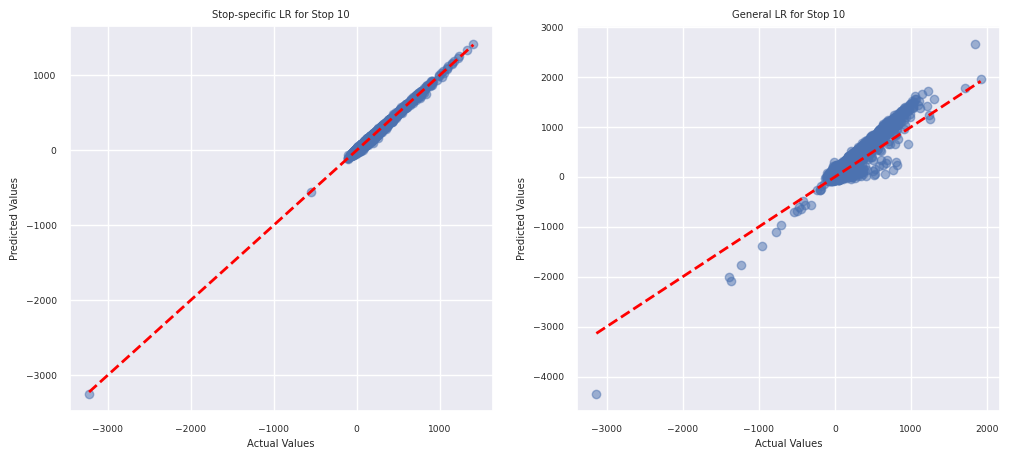

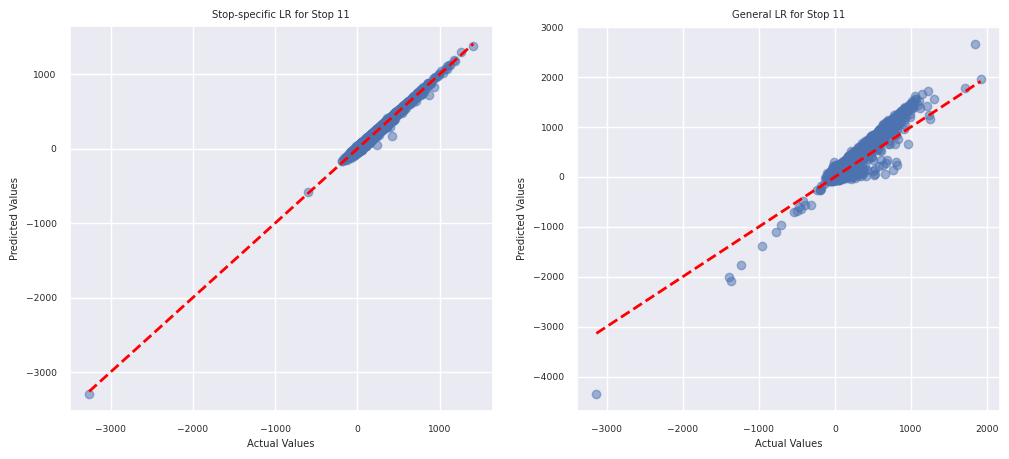

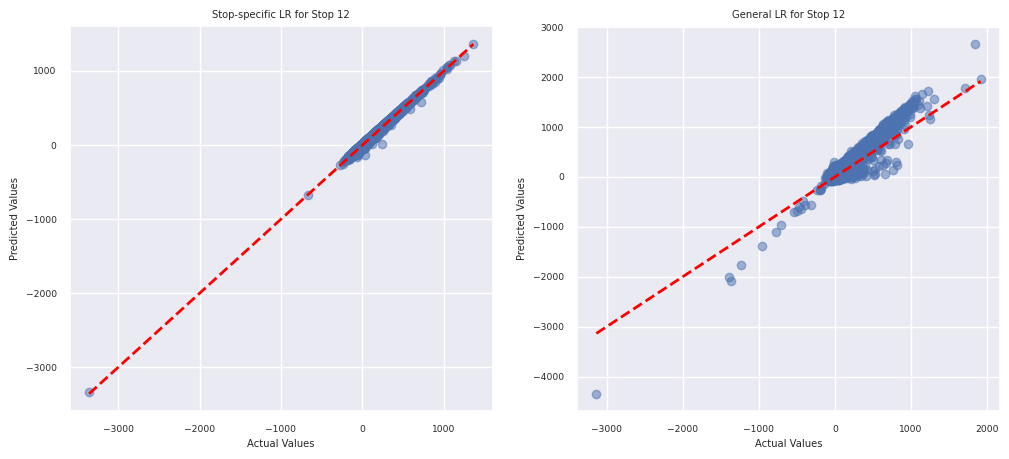

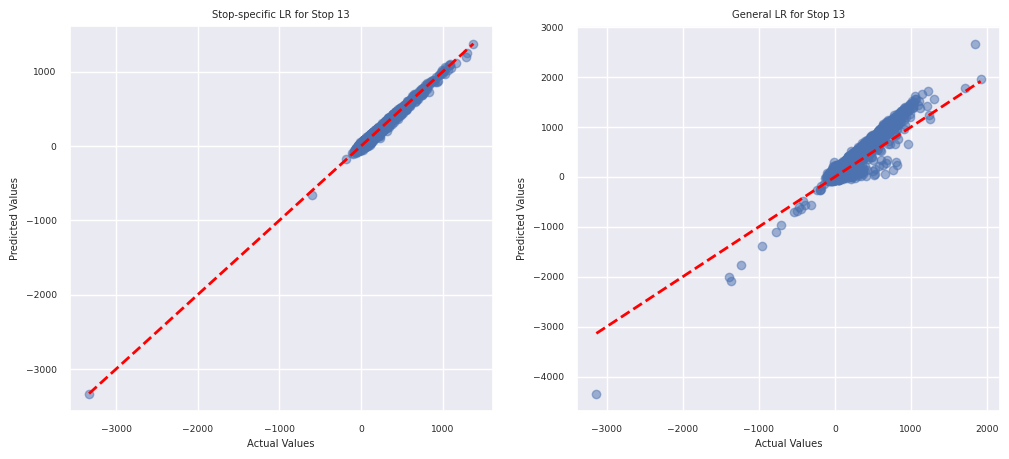

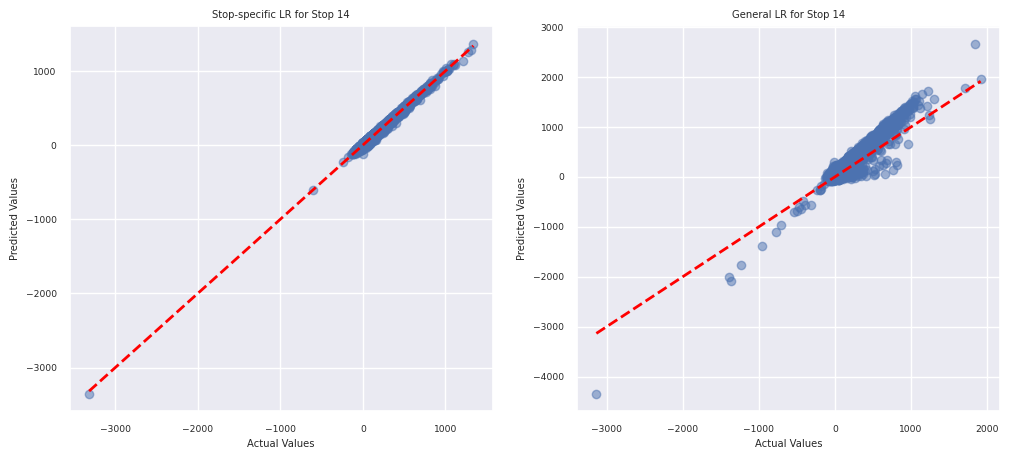

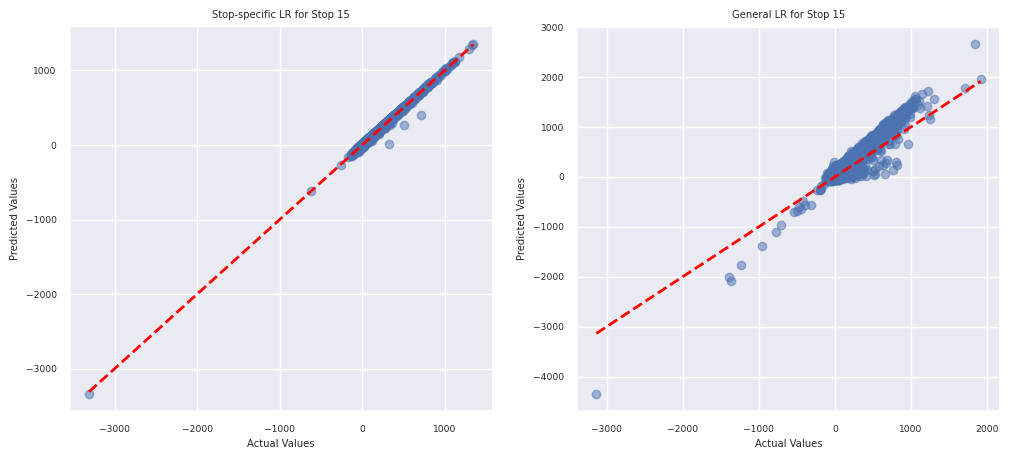

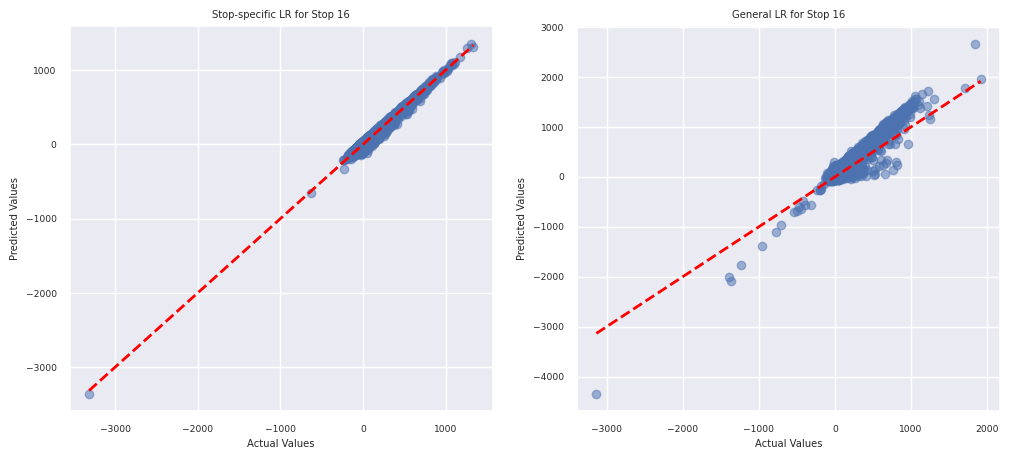

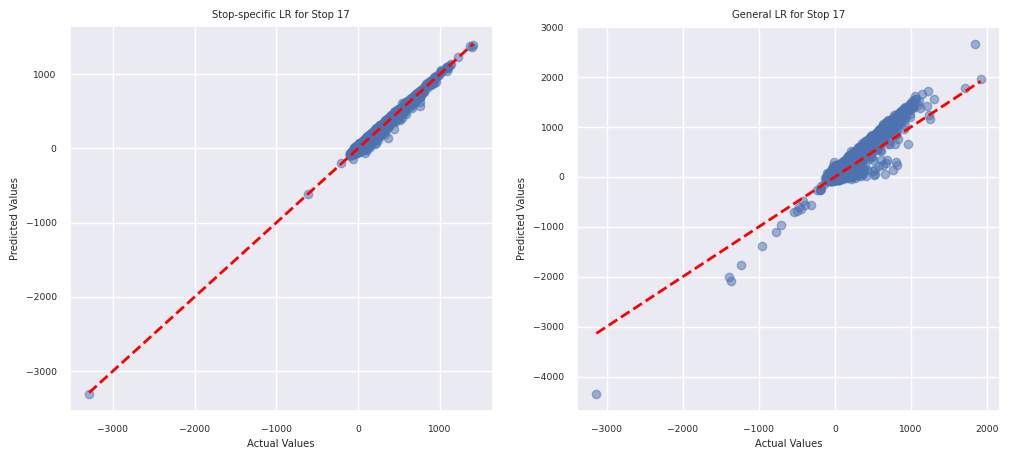

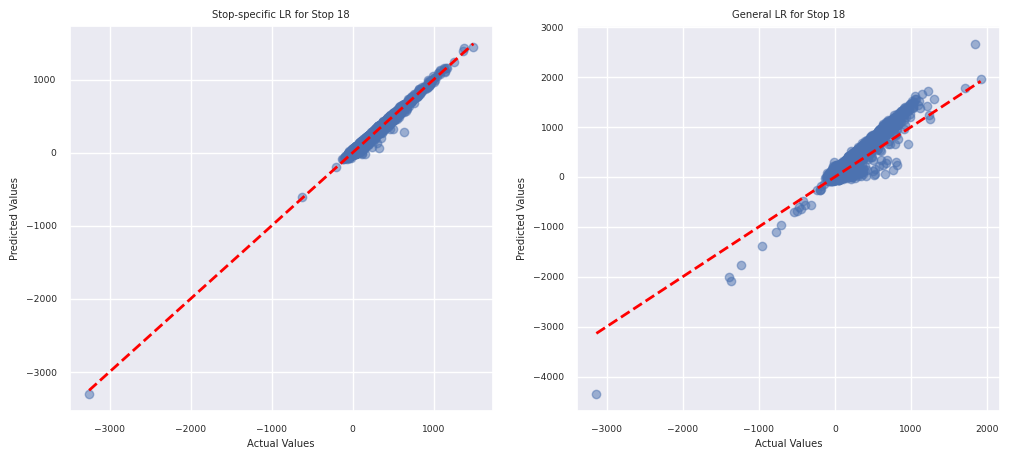

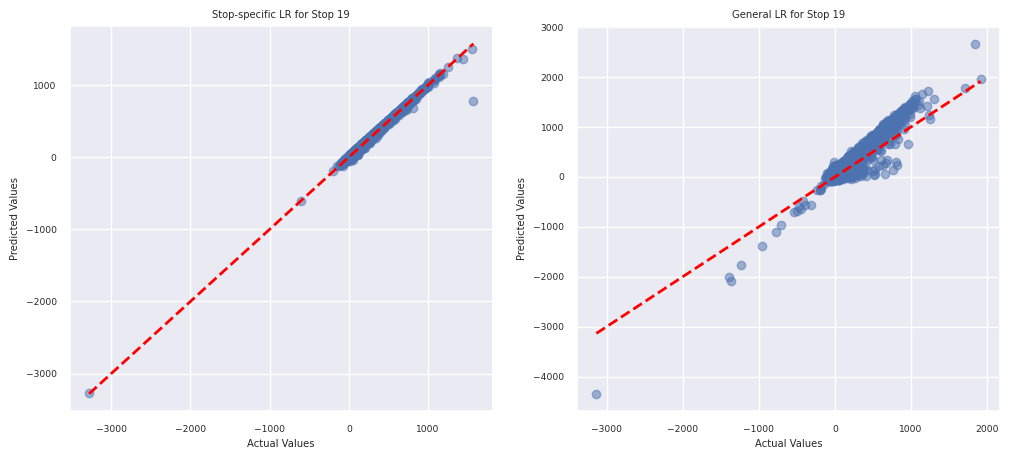

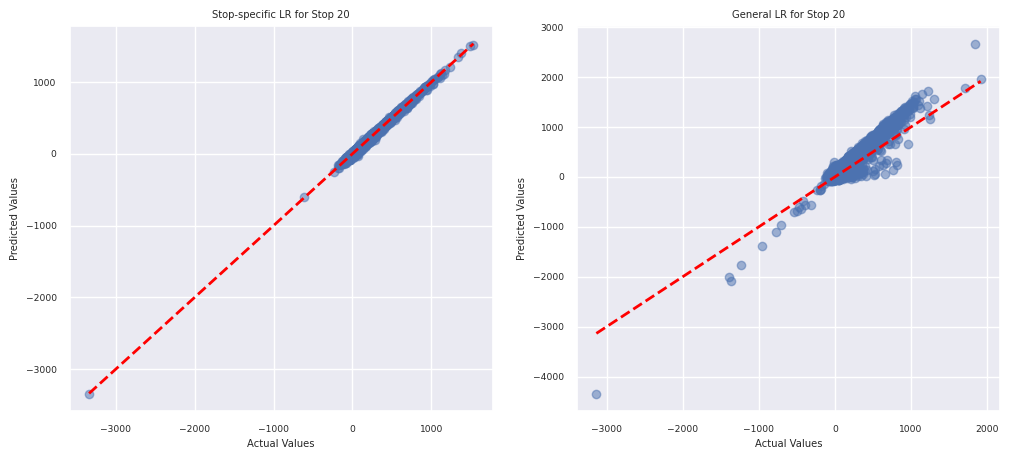

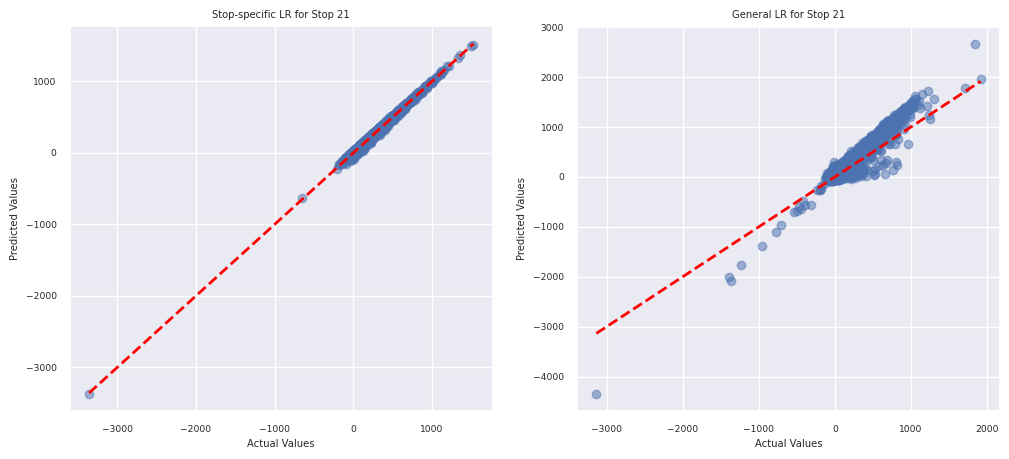

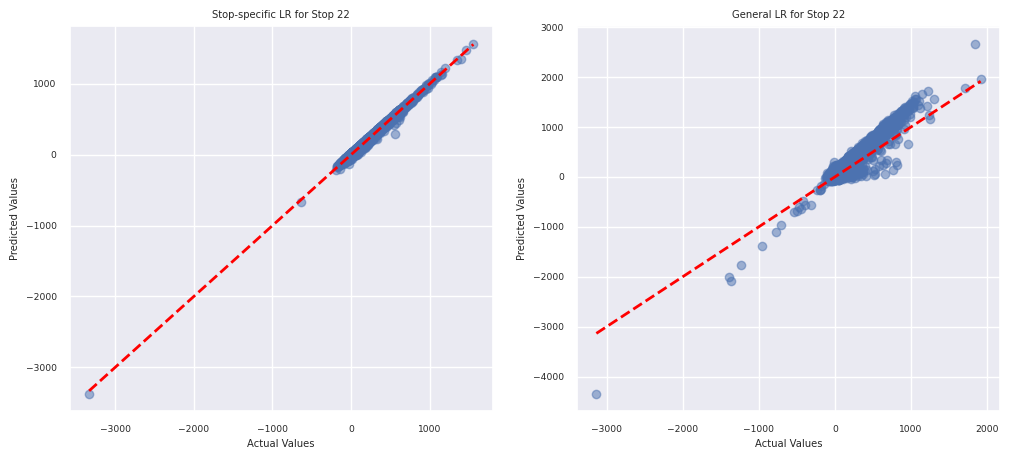

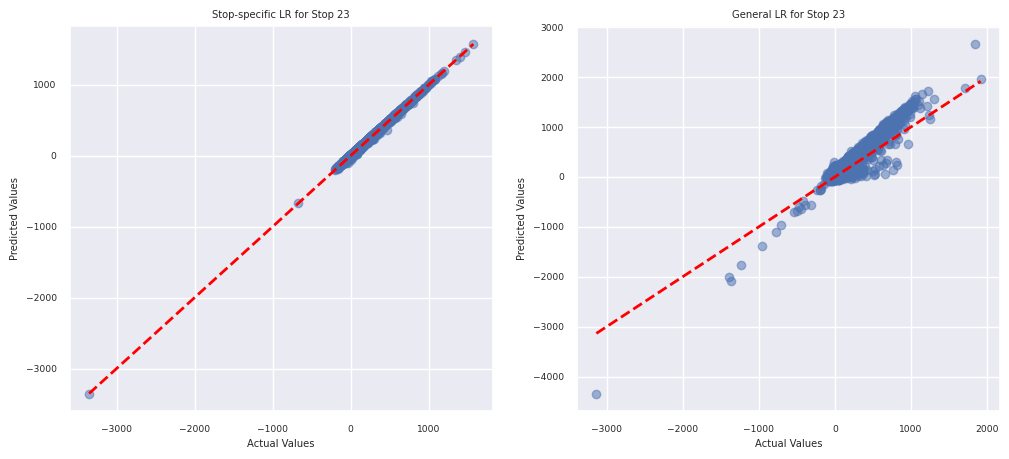

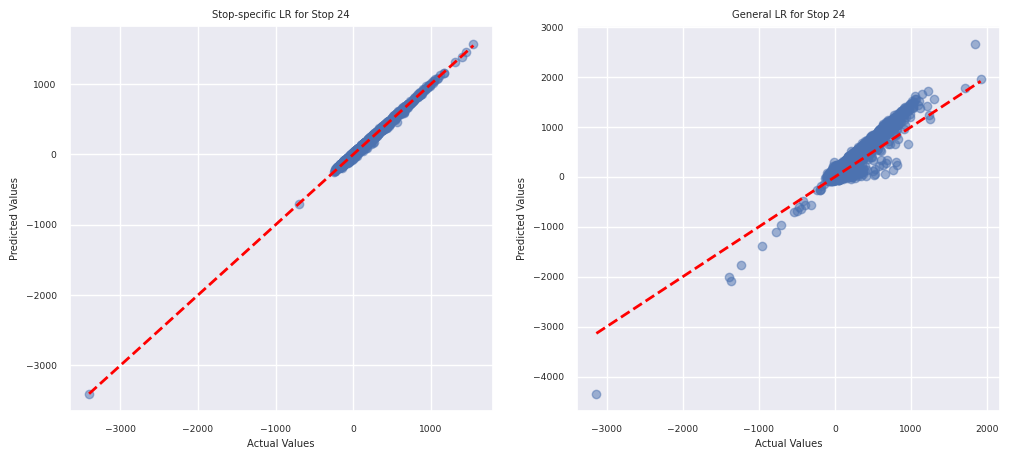

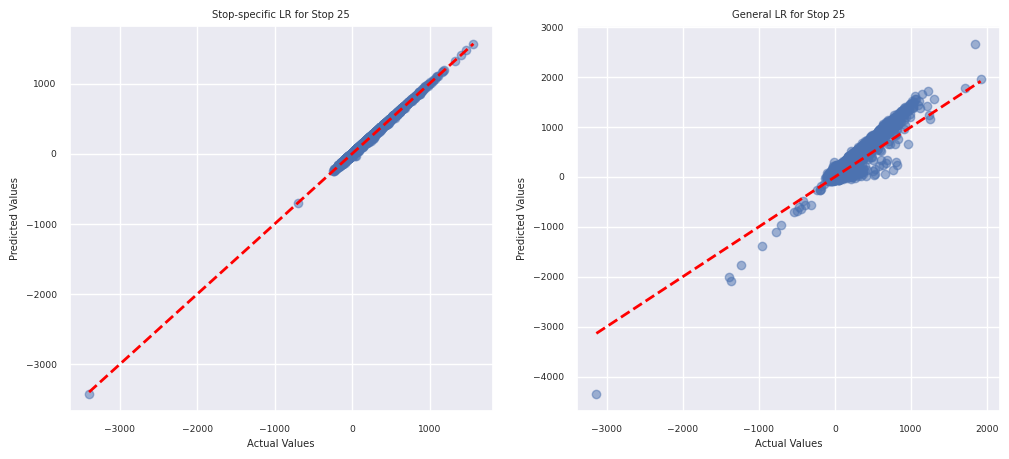

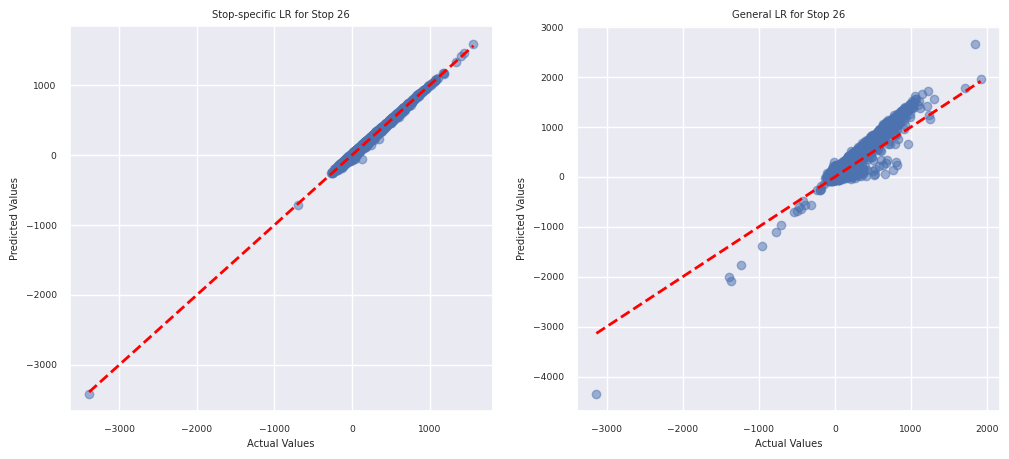

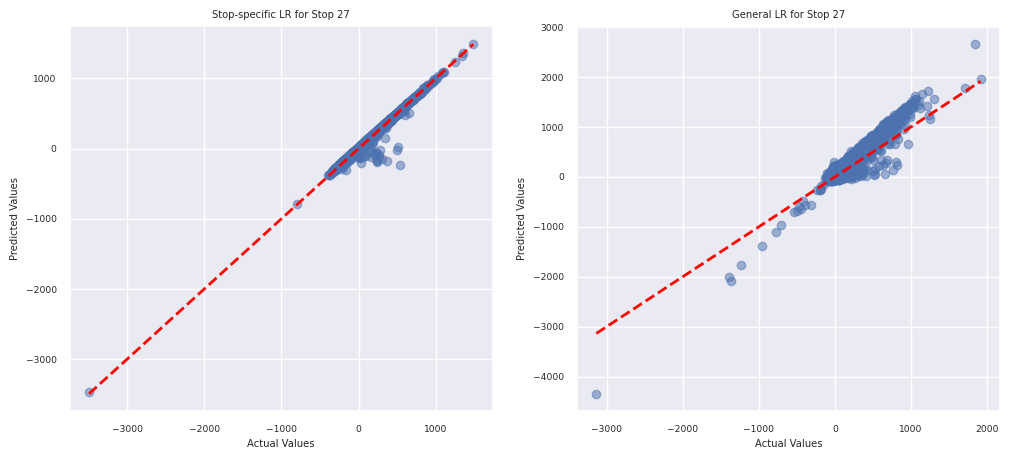

In [92]:
df_station_comp = pd.DataFrame(columns=['stop_sequence', 'model', 'mae', 'mse', 'r2'])

for stop_sequence in df['stop_sequence'].unique():
  # create dataset for each stop sequence
  df_stop = df[df.stop_sequence == stop_sequence]
  X = df_stop[['scheduled_travel_time','previous_bus_delay','previous_trip_travel_time',
                'recurrent_delay', 'upstream_delay_incl_dwell']]
  y = df_stop['arrival_delay']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # STATION-SPECIFIC MODEL
  model_stop = LinearRegression()
  model_stop.fit(X_train, y_train)
  y_pred_stop = model_stop.predict(X_test)
  mae_stop = mean_absolute_error(y_test, y_pred_stop)
  mse_stop = mean_squared_error(y_test, y_pred_stop)
  r2_stop = r2_score(y_test, y_pred_stop)
  df_station_comp.loc[len(df_station_comp)] = [
      stop_sequence,
      'stop-specific',
      mae_stop,
      mse_stop,
      r2_stop
  ]

  # save to keras-style file
  save_to_keras(X_train, model_stop, stop_sequence)

  # GENERAL MODEL (using pre-trained model_lr)
  y_pred_linear = model_lr.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred_linear)
  mse = mean_squared_error(y_test, y_pred_linear)
  r2 = r2_score(y_test, y_pred_linear)
  df_station_comp.loc[len(df_station_comp)] = [
      stop_sequence,
      'general',
      mae,
      mse,
      r2
  ]

  # plot next to each other
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))
  ax[0].scatter(y_test, y_pred_stop, alpha=0.5)
  ax[0].set_xlabel("Actual Values")
  ax[0].set_ylabel("Predicted Values")
  ax[0].set_title(f"Stop-specific LR for Stop {stop_sequence}")
  ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
  ax[1].scatter(y_first, y_first_pred, alpha=0.5)
  ax[1].set_xlabel("Actual Values")
  ax[1].set_ylabel("Predicted Values")
  ax[1].set_title(f"General LR for Stop {stop_sequence}")
  ax[1].plot([min(y_first), max(y_first)], [min(y_first), max(y_first)], linestyle='--', color='red', lw=2)
  fig.show()

display(df_station_comp)

## Predicting further stops ahead

Given that not only the arrival delay at the upcoming stop is to be predicted, but also further ahead stops, we extend the dataframe to include the arrival delays from earlier stations. This way we can easily retrieve the arrival delay of station i-n and use it for the prediction of the arrival delay of station i.

In [36]:
# create dataframe with further upstream stop delays
df_list = []

for i in range(0, len(df), 27):
  sub_df = df.iloc[i:i+27].copy()
  for shift in range(1, max_shifts + 1):
    sub_df[f'upstream_stop_delay_{shift}'] = sub_df['upstream_stop_delay'].shift(shift).fillna(0)

  df_list.append(sub_df)

df_with_upstream_delays = pd.concat(df_list, ignore_index=True)

df_with_upstream_delays = df_with_upstream_delays.drop(['upstream_stop_delay_27'], axis=1)
df_with_upstream_delays.to_csv('data/Dataset-PT_incl_further_upstream_stop_delays')

In [37]:
df_with_upstream_delays

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,upstream_stop_delay_18,upstream_stop_delay_19,upstream_stop_delay_20,upstream_stop_delay_21,upstream_stop_delay_22,upstream_stop_delay_23,upstream_stop_delay_24,upstream_stop_delay_25,upstream_stop_delay_26,upstream_stop_delay_27
0,20220108,4,41344,1,151,0,0,120,100,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20220108,4,41344,2,185,24,171,45,151,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20220108,4,41344,3,186,0,55,41,185,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20220108,4,41344,4,202,12,42,94,186,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20220108,4,41344,5,242,21,98,86,202,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545098,20220630,4,41362,23,344,13,74,44,341,12,...,9.0,39.0,36.0,21.0,12.0,0.0,0.0,0.0,0.0,0.0
545099,20220630,4,41362,24,330,15,34,92,344,12,...,67.0,9.0,39.0,36.0,21.0,12.0,0.0,0.0,0.0,0.0
545100,20220630,4,41362,25,339,17,63,43,330,12,...,197.0,67.0,9.0,39.0,36.0,21.0,12.0,0.0,0.0,0.0
545101,20220630,4,41362,26,331,0,35,58,339,12,...,188.0,197.0,67.0,9.0,39.0,36.0,21.0,12.0,0.0,0.0


Checking correlation of earlier upstream stops

,arrival_delay
arrival_delay,1.000000
upstream_delay_incl_dwell,0.986756
upstream_stop_delay,0.975019
upstream_stop_delay_1,0.944171
upstream_stop_delay_2,0.919444
upstream_stop_delay_3,0.892978
upstream_stop_delay_4,0.858838
upstream_stop_delay_5,0.824153
upstream_stop_delay_6,0.796549
upstream_stop_delay_7,0.769712


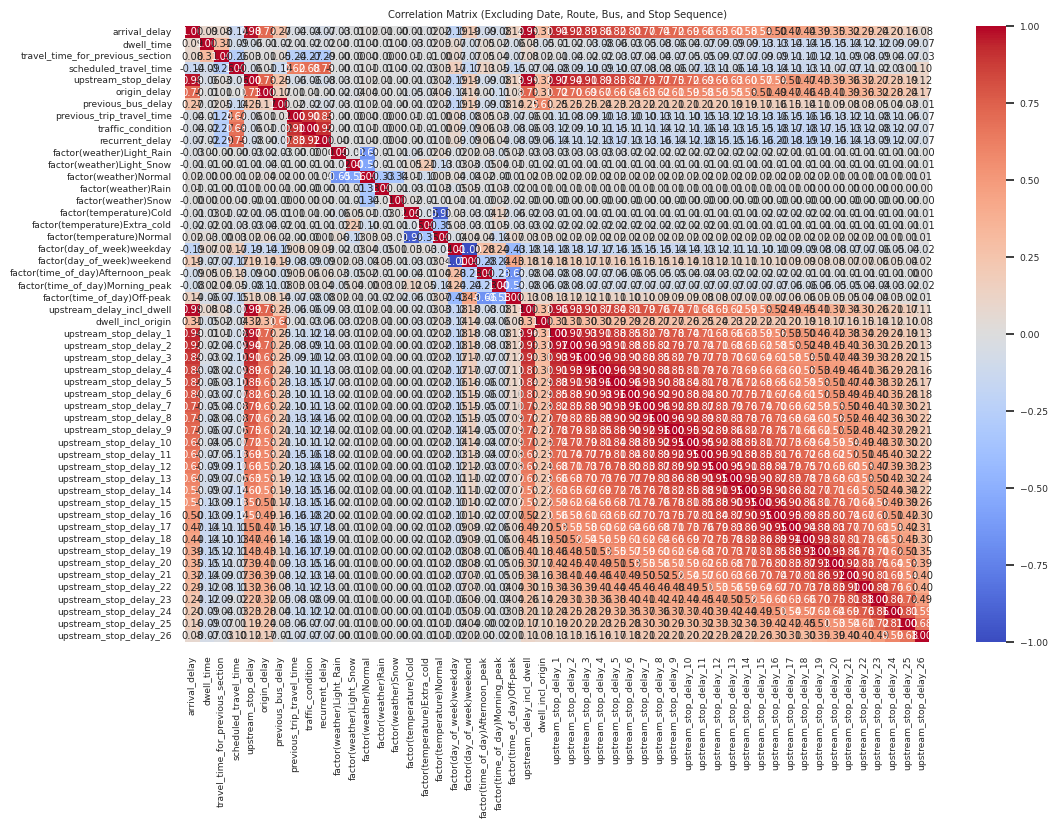

In [46]:
# create correlation matrix of numeric attributes
df_numeric = df_with_upstream_delays.drop(columns=['Calendar_date', 'route_id', 'bus_id', 'stop_sequence'], errors='ignore')
corr_matrix = df_numeric.select_dtypes(include='number').corr()

# variables where correlation is bigger than 0.1
display(pd.DataFrame(corr_matrix[abs(corr_matrix) > 0.1]['arrival_delay'].dropna().sort_values(ascending=False)))

# create heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Excluding Date, Route, Bus, and Stop Sequence)')
plt.show()

Note: Arrival delay at stop i is less correlated with i-10 or more stops earlier than with origin_delay, so only 9-stop-ahead predictions are tested.

Also, a minimal set of input variables is used for this prediction, given that the data would need to be retrieved for each stop at each timestep.

In [ ]:
evals = {}
# for eachs top sequence
for upstream_sequence in range(1,10):
  mae_arr = []
  mse_arr = []
  r2_arr = []

  for stop_sequence in df['stop_sequence'].unique()[:26]:
    df_stop = df_with_upstream_delays[df_with_upstream_delays.stop_sequence == stop_sequence]

    # get data for specific stop, split, scale
    if upstream_sequence >= stop_sequence:
      # no further upstream delay available, only use origin delay
      X = df_stop[['scheduled_travel_time','recurrent_delay', 'origin_delay']]
    else:
      X = df_stop[['scheduled_travel_time','recurrent_delay', f'upstream_stop_delay_{upstream_sequence}', 'origin_delay']]

    y = df_stop['arrival_delay']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # train a LR model on stop-specific data
    model_stop = LinearRegression()
    model_stop.fit(X_train, y_train)
    y_pred_stop = model_stop.predict(X_test)

    # calculate evaluation metrics
    mae_arr.append(mean_absolute_error(y_test, y_pred_stop))
    mse_arr.append(mean_squared_error(y_test, y_pred_stop))
    r2_arr.append(r2_score(y_test, y_pred_stop))

  evals[upstream_sequence]={
      'mae': mae_arr,
      'mse': mse_arr,
      'r2': r2_arr
  }

evals

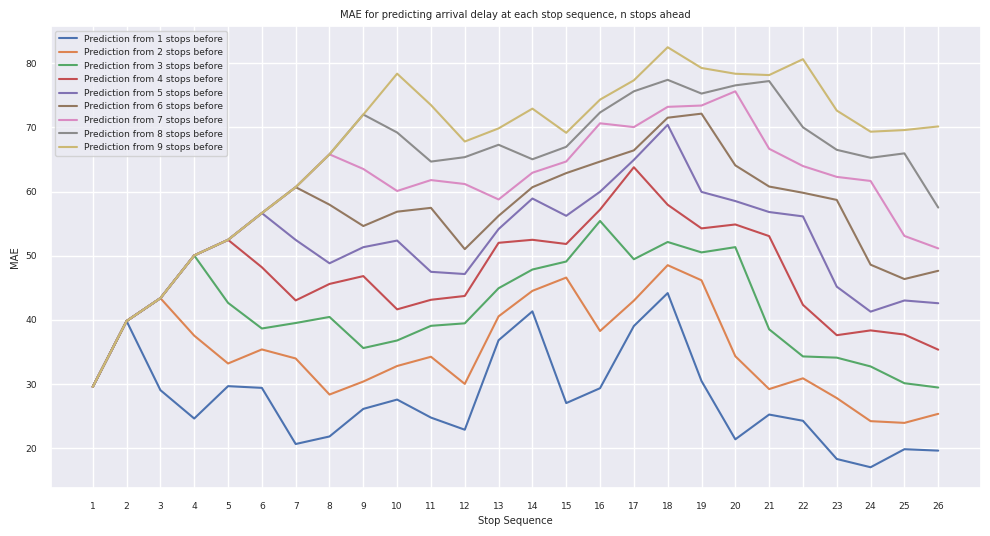

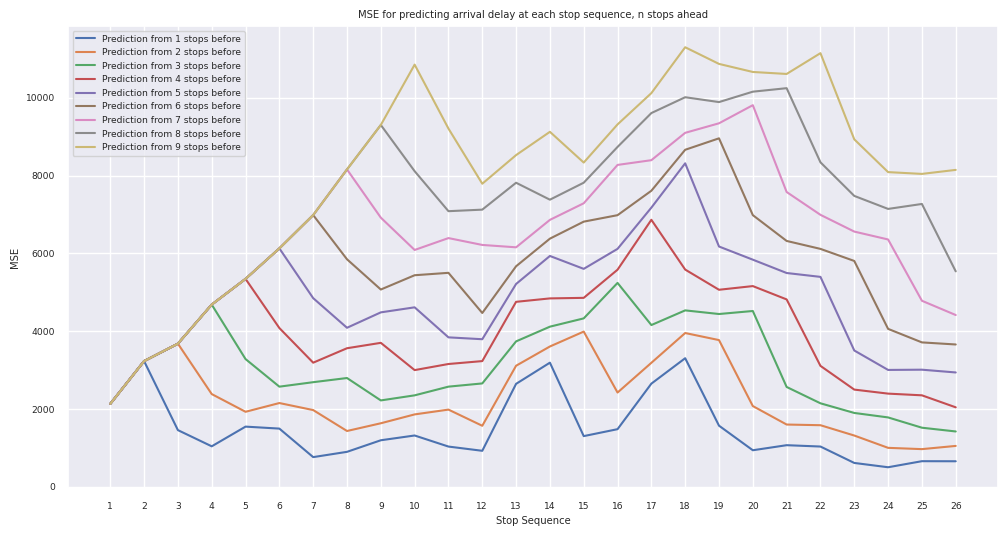

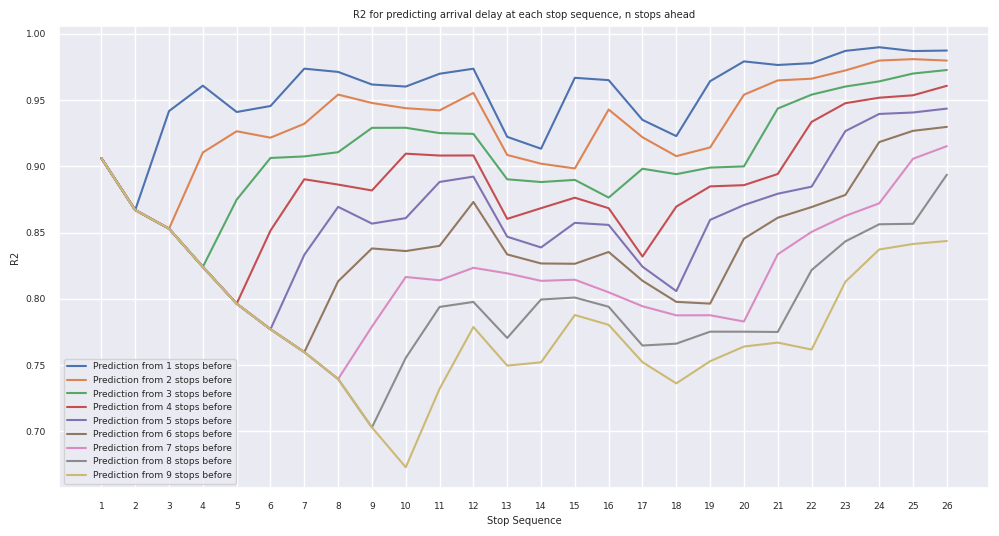

In [77]:
for metric in ['mae', 'mse', 'r2']:
  plt.figure(figsize=(12, 6))
  for upstream_sequence in range(1,10):
    plt.plot(range(1,27), evals[upstream_sequence][metric], label=f'Prediction from {upstream_sequence} stops before')

  plt.title(f'{metric.upper()} for predicting arrival delay at each stop sequence, n stops ahead')
  plt.xlabel('Stop Sequence')
  plt.ylabel(metric.upper())
  plt.xticks(range(1, 27))
  plt.grid(True)
  plt.legend()
  plt.show()

In [78]:
# compute average per upstream sequence
df_ahead_eval = pd.DataFrame(columns=['n stops ahead', 'MAE', 'MSE', 'R2'])
for upstream_sequence in range(1,10):
  df_ahead_eval.loc[len(df_ahead_eval)] = [
      upstream_sequence,
      np.mean(evals[upstream_sequence]['mae']),
      np.mean(evals[upstream_sequence]['mse']),
      np.mean(evals[upstream_sequence]['r2'])
  ]
df_ahead_eval

,n stops ahead,MAE,MSE,R2
0,1.0,27.687659,1489.250153,0.955639
1,2.0,35.079915,2294.186647,0.932829
2,3.0,41.345968,3127.801839,0.909912
3,4.0,46.777652,3959.290789,0.887291
4,5.0,51.522043,4792.705062,0.865316
5,6.0,55.807905,5625.076256,0.843968
6,7.0,59.732729,6456.692966,0.823106
7,8.0,63.405728,7284.330979,0.802563
8,9.0,66.700387,8103.954005,0.782679
